In [40]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

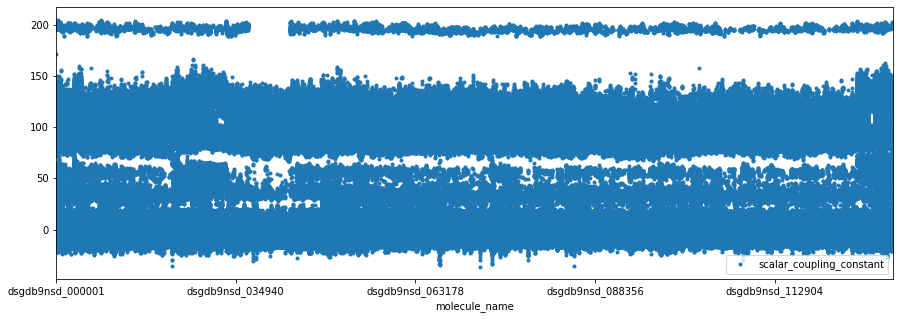

In [12]:
df = pd.read_csv('../input/train.csv')
df2 = pd.read_csv('../submissions/BLEND028_sub_-1.93258CV.csv')
df.sort_values('molecule_name') \
    .reset_index(drop=True) \
    .plot(x='molecule_name',
          y='scalar_coupling_constant',
          style='.',
          figsize=(15, 5))

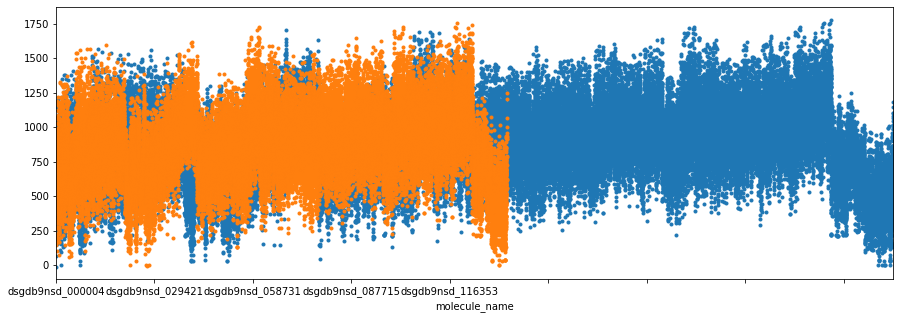

In [25]:
df.groupby('molecule_name')['scalar_coupling_constant'] \
    .agg(sum) \
    .plot(style='.', figsize=(15, 5))
df2.groupby('molecule_name')['scalar_coupling_constant'] \
    .agg(sum) \
    .plot(style='.', figsize=(15, 5))

In [20]:
df3 = pd.read_csv('../input/test.csv')

In [22]:
df3.head()

,id,molecule_name,atom_index_0,atom_index_1,type
0,4658147,dsgdb9nsd_000004,2,0,2JHC
1,4658148,dsgdb9nsd_000004,2,1,1JHC
2,4658149,dsgdb9nsd_000004,2,3,3JHH
3,4658150,dsgdb9nsd_000004,3,0,1JHC
4,4658151,dsgdb9nsd_000004,3,1,2JHC


In [23]:
df2['molecule_name'] = df3['molecule_name']

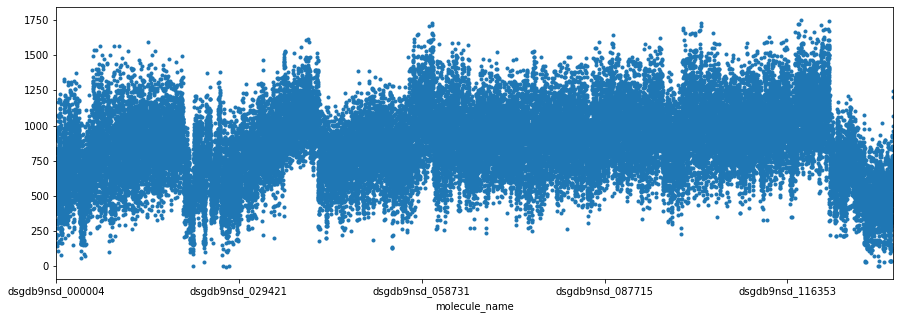

In [24]:
df2.groupby('molecule_name')['scalar_coupling_constant'] \
    .agg(sum) \
    .plot(style='.', figsize=(15, 5), colo=)

In [31]:
df['actual'] = True
df2['actual'] = False

In [47]:
df_combined = pd.concat([df, df2], sort=False)

In [49]:
agged_df = df_combined.groupby('molecule_name')[['scalar_coupling_constant','actual']] \
    .agg(sum)

In [61]:
agged_df['train'] = [1 if x > 0 else 0 for x in agged_df['actual']]

In [67]:
agged_df = agged_df.reset_index()

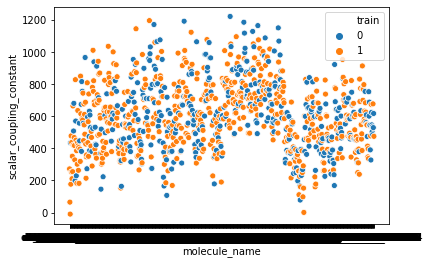

In [70]:
sns.scatterplot(data=agged_df.head(1000), x='molecule_name', y='scalar_coupling_constant', hue='train')

In [76]:
agged_with_type = agged_df.merge(df_combined[['molecule_name','type']].drop_duplicates(),
               on='molecule_name',
               how='left')

In [84]:
agged_with_type['mol_number'] = agged_with_type['molecule_name'].str.replace('dsgdb9nsd_','').astype(int)

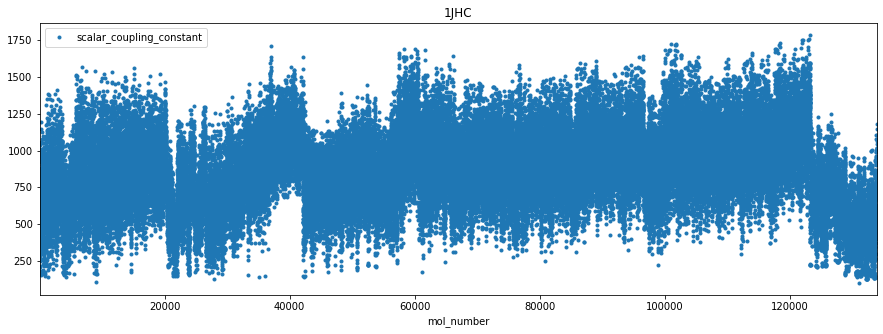

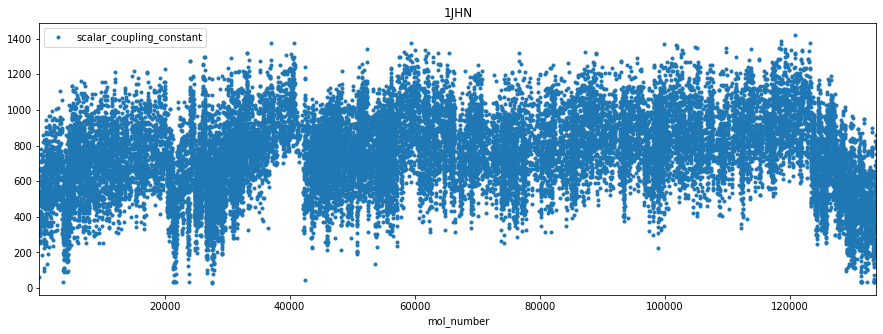

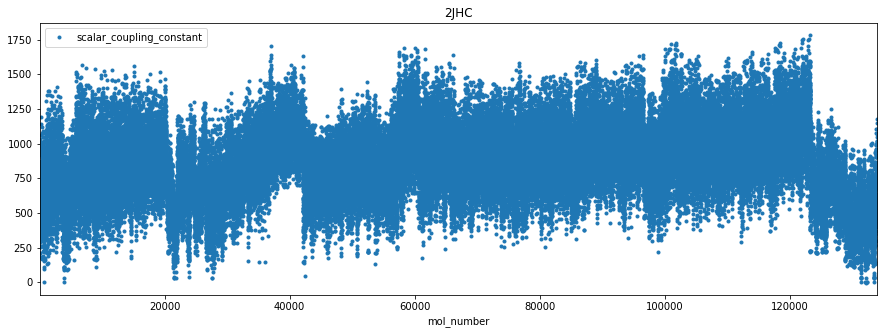

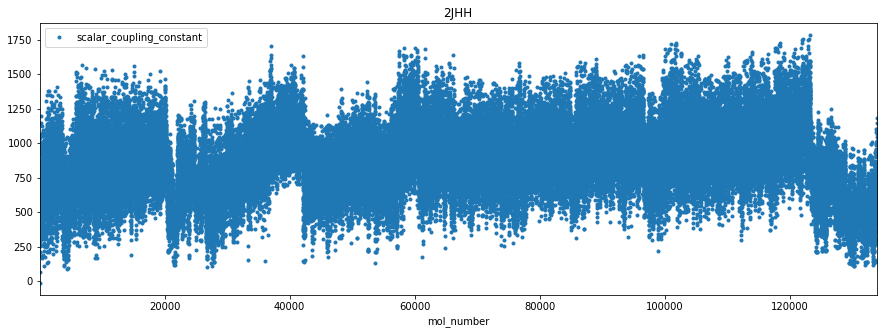

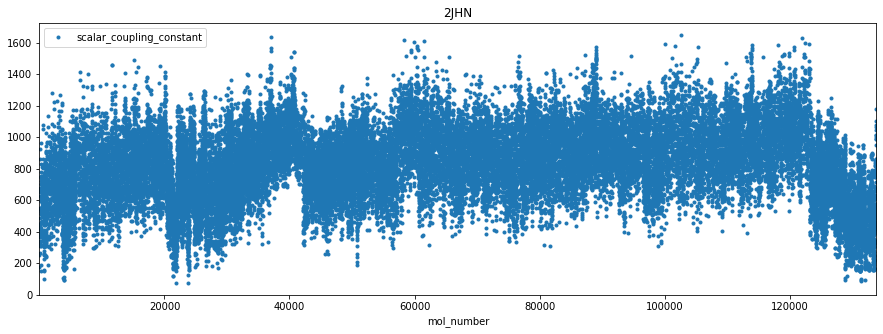

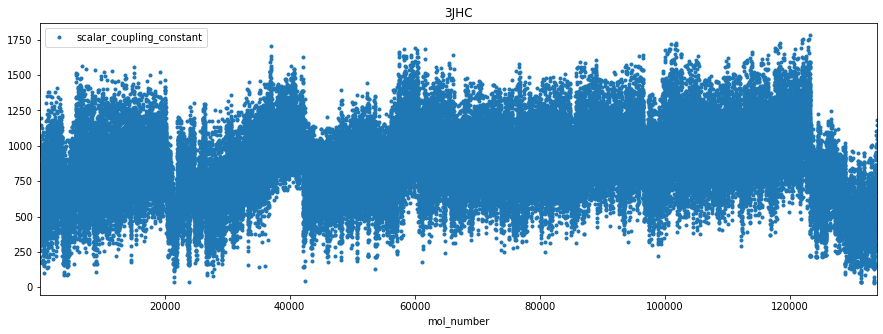

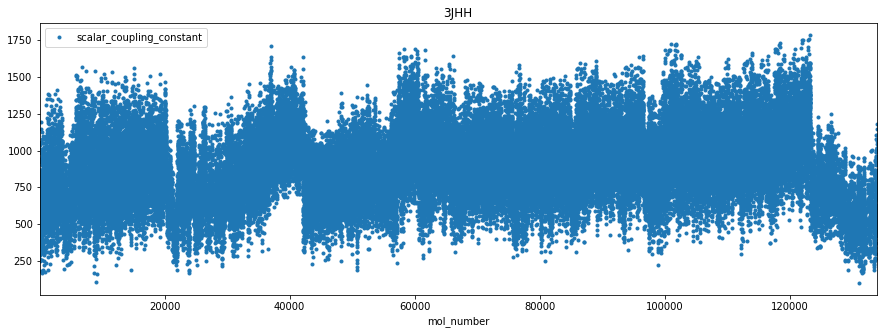

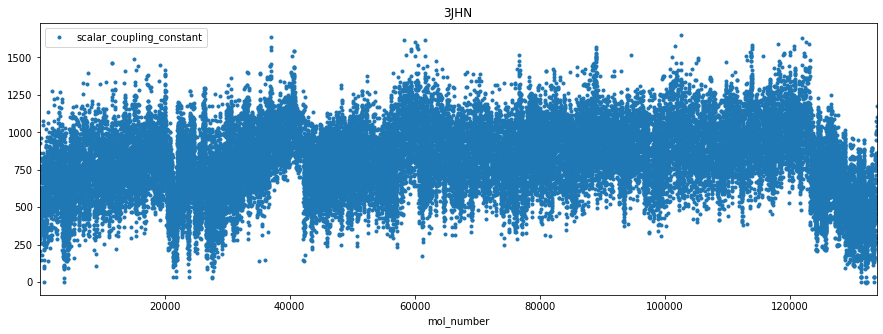

In [86]:
for i, d in agged_with_type.groupby('type'):
    d.plot(x='mol_number', y='scalar_coupling_constant', figsize=(15, 5), title=i, style='.')
    plt.show()